## Credit_risk_customers : problem statement
Target : Predict if customers are risky or not for credit

https://www.kaggle.com/datasets/ppb00x/credit-risk-customers

This dataset consists of 20 features of the customers.
It could be used to predict if the customer could be given credit.
Many features require data cleaning.
This is a great dataset for practicing data cleaning and feature engineering and building a binary classification model.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_score,recall_score,f1_score
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder

In [2]:
df=pd.read_csv("credit_customers.csv")
df

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,male single,none,...,real estate,67.0,none,own,2.0,skilled,1.0,yes,yes,good
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,female div/dep/mar,none,...,real estate,22.0,none,own,1.0,skilled,1.0,none,yes,bad
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,male single,none,...,real estate,49.0,none,own,1.0,unskilled resident,2.0,none,yes,good
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,male single,guarantor,...,life insurance,45.0,none,for free,1.0,skilled,2.0,none,yes,good
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0,male single,none,...,no known property,53.0,none,for free,2.0,skilled,2.0,none,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking,12.0,existing paid,furniture/equipment,1736.0,<100,4<=X<7,3.0,female div/dep/mar,none,...,real estate,31.0,none,own,1.0,unskilled resident,1.0,none,yes,good
996,<0,30.0,existing paid,used car,3857.0,<100,1<=X<4,4.0,male div/sep,none,...,life insurance,40.0,none,own,1.0,high qualif/self emp/mgmt,1.0,yes,yes,good
997,no checking,12.0,existing paid,radio/tv,804.0,<100,>=7,4.0,male single,none,...,car,38.0,none,own,1.0,skilled,1.0,none,yes,good
998,<0,45.0,existing paid,radio/tv,1845.0,<100,1<=X<4,4.0,male single,none,...,no known property,23.0,none,for free,1.0,skilled,1.0,yes,yes,bad


In [3]:
df.duplicated().sum()

0

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   checking_status         1000 non-null   object 
 1   duration                1000 non-null   float64
 2   credit_history          1000 non-null   object 
 3   purpose                 1000 non-null   object 
 4   credit_amount           1000 non-null   float64
 5   savings_status          1000 non-null   object 
 6   employment              1000 non-null   object 
 7   installment_commitment  1000 non-null   float64
 8   personal_status         1000 non-null   object 
 9   other_parties           1000 non-null   object 
 10  residence_since         1000 non-null   float64
 11  property_magnitude      1000 non-null   object 
 12  age                     1000 non-null   float64
 13  other_payment_plans     1000 non-null   object 
 14  housing                 1000 non-null   o

In [5]:
df.describe(include="all").transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
checking_status,1000,4,no checking,394,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duration,1000.0,NaN,NaN,NaN,20.903,12.058814,4.0,12.0,18.0,24.0,72.0
credit_history,1000,5,existing paid,530,NaN,NaN,NaN,NaN,NaN,NaN,NaN
purpose,1000,10,radio/tv,280,NaN,NaN,NaN,NaN,NaN,NaN,NaN
credit_amount,1000.0,NaN,NaN,NaN,3271.258,2822.736876,250.0,1365.5,2319.5,3972.25,18424.0
savings_status,1000,5,<100,603,NaN,NaN,NaN,NaN,NaN,NaN,NaN
employment,1000,5,1<=X<4,339,NaN,NaN,NaN,NaN,NaN,NaN,NaN
installment_commitment,1000.0,NaN,NaN,NaN,2.973,1.118715,1.0,2.0,3.0,4.0,4.0
personal_status,1000,4,male single,548,NaN,NaN,NaN,NaN,NaN,NaN,NaN
other_parties,1000,3,none,907,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
for col in df.columns:
    print(df[col].value_counts())

checking_status
no checking    394
<0             274
0<=X<200       269
>=200           63
Name: count, dtype: int64
duration
24.0    184
12.0    179
18.0    113
36.0     83
6.0      75
15.0     64
9.0      49
48.0     48
30.0     40
21.0     30
10.0     28
60.0     13
27.0     13
42.0     11
11.0      9
20.0      8
8.0       7
4.0       6
45.0      5
7.0       5
39.0      5
14.0      4
13.0      4
33.0      3
28.0      3
54.0      2
16.0      2
22.0      2
47.0      1
5.0       1
26.0      1
72.0      1
40.0      1
Name: count, dtype: int64
credit_history
existing paid                     530
critical/other existing credit    293
delayed previously                 88
all paid                           49
no credits/all paid                40
Name: count, dtype: int64
purpose
radio/tv               280
new car                234
furniture/equipment    181
used car               103
business                97
education               50
repairs                 22
domestic appliance     

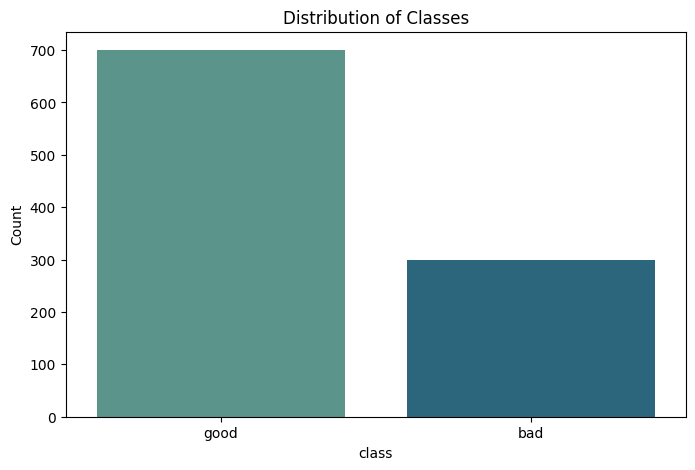

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.countplot(x='class', data=df,hue="class",palette="crest")
plt.title("Distribution of Classes")
plt.ylabel("Count")
plt.show()

In [8]:
df["employment"].value_counts()

employment
1<=X<4        339
>=7           253
4<=X<7        174
<1            172
unemployed     62
Name: count, dtype: int64

Drop less important and with most None rows and columns

In [9]:
df.drop(columns=["other_parties","personal_status","other_payment_plans","foreign_worker","employment","purpose"],axis=1,inplace=True)

## Label Encoding

In [10]:
df["class"].unique()

array(['good', 'bad'], dtype=object)

In [11]:
df["own_telephone"].unique()

array(['yes', 'none'], dtype=object)

In [12]:
label = LabelEncoder()
df["class"]=label.fit_transform(df["class"])
df["own_telephone"]=label.fit_transform(df["own_telephone"])
df

,checking_status,duration,credit_history,credit_amount,savings_status,installment_commitment,residence_since,property_magnitude,age,housing,existing_credits,job,num_dependents,own_telephone,class
0,<0,6.0,critical/other existing credit,1169.0,no known savings,4.0,4.0,real estate,67.0,own,2.0,skilled,1.0,1,1
1,0<=X<200,48.0,existing paid,5951.0,<100,2.0,2.0,real estate,22.0,own,1.0,skilled,1.0,0,0
2,no checking,12.0,critical/other existing credit,2096.0,<100,2.0,3.0,real estate,49.0,own,1.0,unskilled resident,2.0,0,1
3,<0,42.0,existing paid,7882.0,<100,2.0,4.0,life insurance,45.0,for free,1.0,skilled,2.0,0,1
4,<0,24.0,delayed previously,4870.0,<100,3.0,4.0,no known property,53.0,for free,2.0,skilled,2.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking,12.0,existing paid,1736.0,<100,3.0,4.0,real estate,31.0,own,1.0,unskilled resident,1.0,0,1
996,<0,30.0,existing paid,3857.0,<100,4.0,4.0,life insurance,40.0,own,1.0,high qualif/self emp/mgmt,1.0,1,1
997,no checking,12.0,existing paid,804.0,<100,4.0,4.0,car,38.0,own,1.0,skilled,1.0,0,1
998,<0,45.0,existing paid,1845.0,<100,4.0,4.0,no known property,23.0,for free,1.0,skilled,1.0,1,0


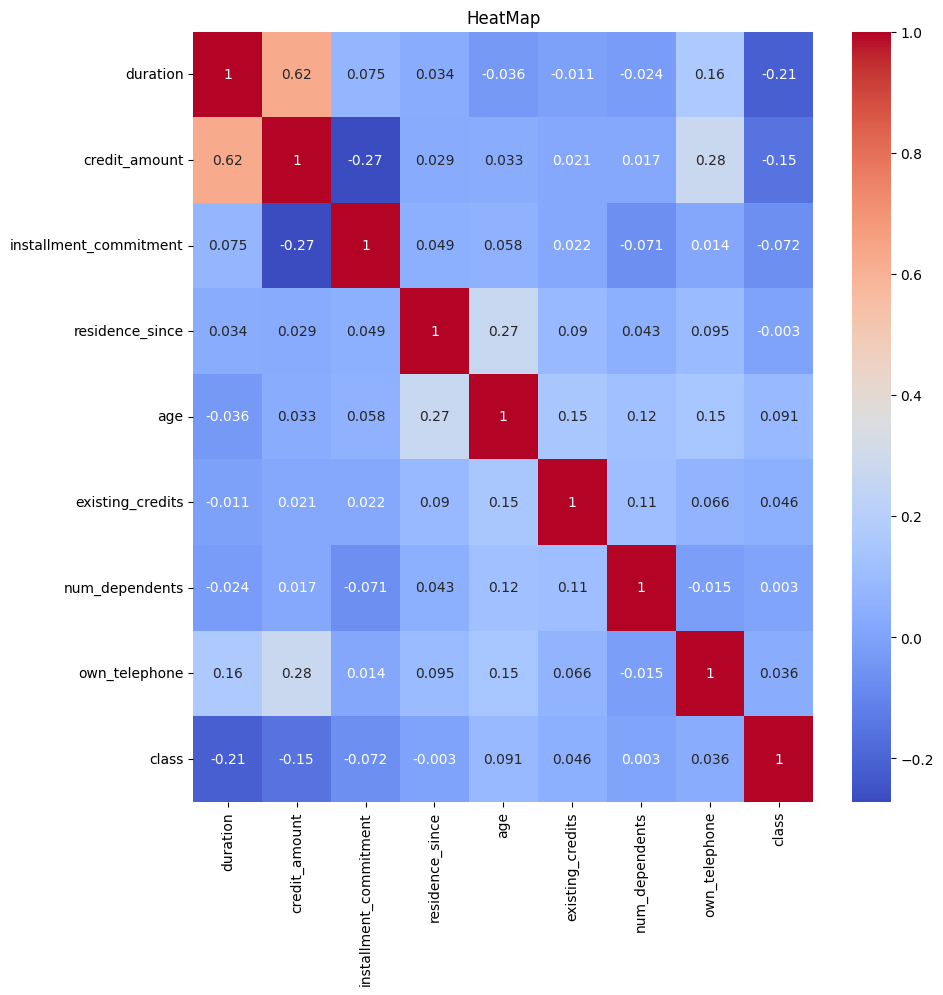

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap="coolwarm")
plt.title("HeatMap")
plt.show()

In [14]:
df.drop(["duration"],axis=1,inplace=True) # duration is highly correlated to credit_amount and less compared to target

## Ordinal Encoding

In [15]:
df["savings_status"].unique()

array(['no known savings', '<100', '500<=X<1000', '>=1000', '100<=X<500'],
      dtype=object)

In [16]:
df["checking_status"].unique()

array(['<0', '0<=X<200', 'no checking', '>=200'], dtype=object)

In [17]:
df["job"].unique()

array(['skilled', 'unskilled resident', 'high qualif/self emp/mgmt',
       'unemp/unskilled non res'], dtype=object)

In [18]:
ordinal_map = {
    'savings_status': {'no known savings':0, '<100':1, '100<=X<500':2, '500<=X<1000':3,'>=1000':4},
    'checking_status': {'<0':0,'no checking':0, '0<=X<200':1, '>=200':2},
    'job': {'unemp/unskilled non res':0, 'unskilled resident':1, 'skilled':2, 'high qualif/self emp/mgmt':3}
}

for col, mapping in ordinal_map.items():
    df[col] = df[col].map(mapping)

In [19]:
df["credit_history"].value_counts()

credit_history
existing paid                     530
critical/other existing credit    293
delayed previously                 88
all paid                           49
no credits/all paid                40
Name: count, dtype: int64

In [20]:
# Ordinal Encoding : Ranking customers based on their credit history

ordinal_map = {
    'credit_history': {'delayed previously':0, 'critical/other existing credit':1,
                       'existing paid':2,'all paid':2,'no credits/all paid':3}
}

for col, mapping in ordinal_map.items():
    df[col] = df[col].map(mapping)

In [21]:
df["credit_history"].value_counts()

credit_history
2    579
1    293
0     88
3     40
Name: count, dtype: int64

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   checking_status         1000 non-null   int64  
 1   credit_history          1000 non-null   int64  
 2   credit_amount           1000 non-null   float64
 3   savings_status          1000 non-null   int64  
 4   installment_commitment  1000 non-null   float64
 5   residence_since         1000 non-null   float64
 6   property_magnitude      1000 non-null   object 
 7   age                     1000 non-null   float64
 8   housing                 1000 non-null   object 
 9   existing_credits        1000 non-null   float64
 10  job                     1000 non-null   int64  
 11  num_dependents          1000 non-null   float64
 12  own_telephone           1000 non-null   int32  
 13  class                   1000 non-null   int32  
dtypes: float64(6), int32(2), int64(4), object

## Frequency Encoding

In [23]:
df["housing"].unique()

array(['own', 'for free', 'rent'], dtype=object)

In [24]:
freq=df["housing"].value_counts()
df["housing"]=df["housing"].map(freq)


In [25]:
df["property_magnitude"].value_counts()

property_magnitude
car                  332
real estate          282
life insurance       232
no known property    154
Name: count, dtype: int64

In [26]:
freq=df["property_magnitude"].value_counts()
df["property_magnitude"]=df["property_magnitude"].map(freq)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   checking_status         1000 non-null   int64  
 1   credit_history          1000 non-null   int64  
 2   credit_amount           1000 non-null   float64
 3   savings_status          1000 non-null   int64  
 4   installment_commitment  1000 non-null   float64
 5   residence_since         1000 non-null   float64
 6   property_magnitude      1000 non-null   int64  
 7   age                     1000 non-null   float64
 8   housing                 1000 non-null   int64  
 9   existing_credits        1000 non-null   float64
 10  job                     1000 non-null   int64  
 11  num_dependents          1000 non-null   float64
 12  own_telephone           1000 non-null   int32  
 13  class                   1000 non-null   int32  
dtypes: float64(6), int32(2), int64(6)
memory 

In [28]:
df["existing_credits"].value_counts()

existing_credits
1.0    633
2.0    333
3.0     28
4.0      6
Name: count, dtype: int64

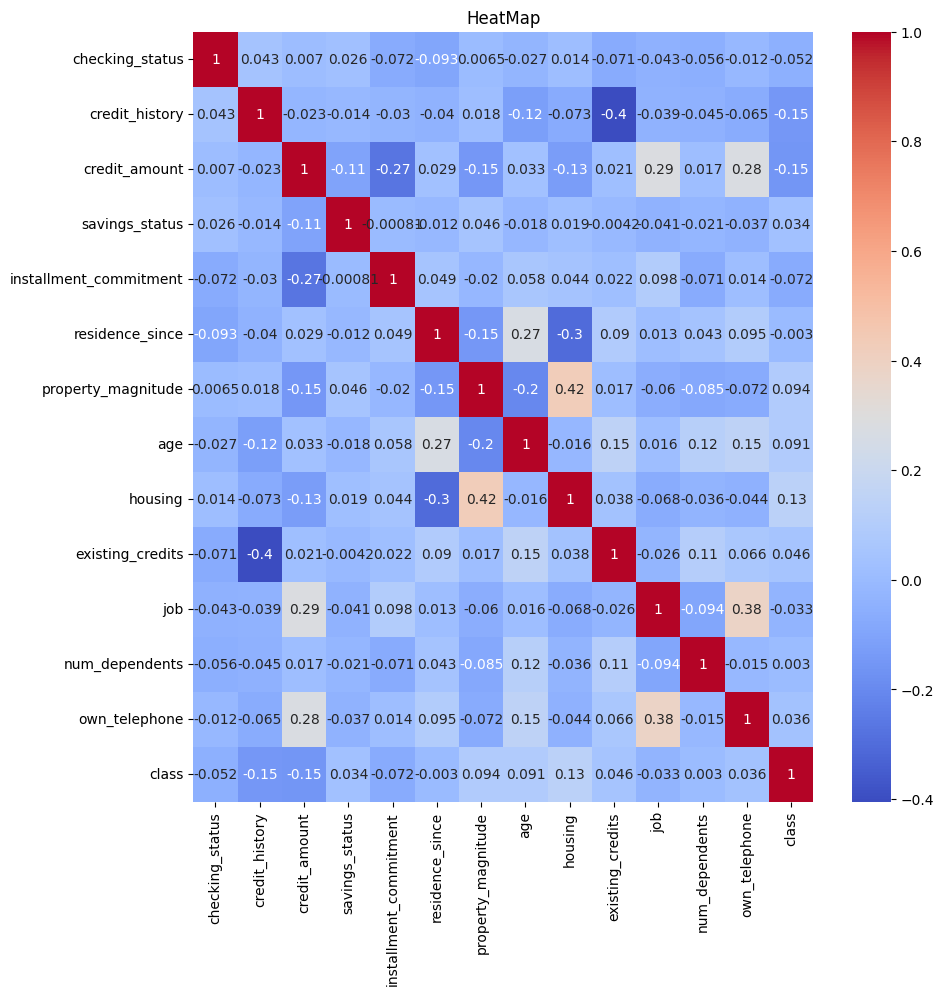

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap="coolwarm")
plt.title("HeatMap")
plt.show()

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   checking_status         1000 non-null   int64  
 1   credit_history          1000 non-null   int64  
 2   credit_amount           1000 non-null   float64
 3   savings_status          1000 non-null   int64  
 4   installment_commitment  1000 non-null   float64
 5   residence_since         1000 non-null   float64
 6   property_magnitude      1000 non-null   int64  
 7   age                     1000 non-null   float64
 8   housing                 1000 non-null   int64  
 9   existing_credits        1000 non-null   float64
 10  job                     1000 non-null   int64  
 11  num_dependents          1000 non-null   float64
 12  own_telephone           1000 non-null   int32  
 13  class                   1000 non-null   int32  
dtypes: float64(6), int32(2), int64(6)
memory 

In [31]:
df

,checking_status,credit_history,credit_amount,savings_status,installment_commitment,residence_since,property_magnitude,age,housing,existing_credits,job,num_dependents,own_telephone,class
0,0,1,1169.0,0,4.0,4.0,282,67.0,713,2.0,2,1.0,1,1
1,1,2,5951.0,1,2.0,2.0,282,22.0,713,1.0,2,1.0,0,0
2,0,1,2096.0,1,2.0,3.0,282,49.0,713,1.0,1,2.0,0,1
3,0,2,7882.0,1,2.0,4.0,232,45.0,108,1.0,2,2.0,0,1
4,0,0,4870.0,1,3.0,4.0,154,53.0,108,2.0,2,2.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,2,1736.0,1,3.0,4.0,282,31.0,713,1.0,1,1.0,0,1
996,0,2,3857.0,1,4.0,4.0,232,40.0,713,1.0,3,1.0,1,1
997,0,2,804.0,1,4.0,4.0,332,38.0,713,1.0,2,1.0,0,1
998,0,2,1845.0,1,4.0,4.0,154,23.0,108,1.0,2,1.0,1,0


## Skewness

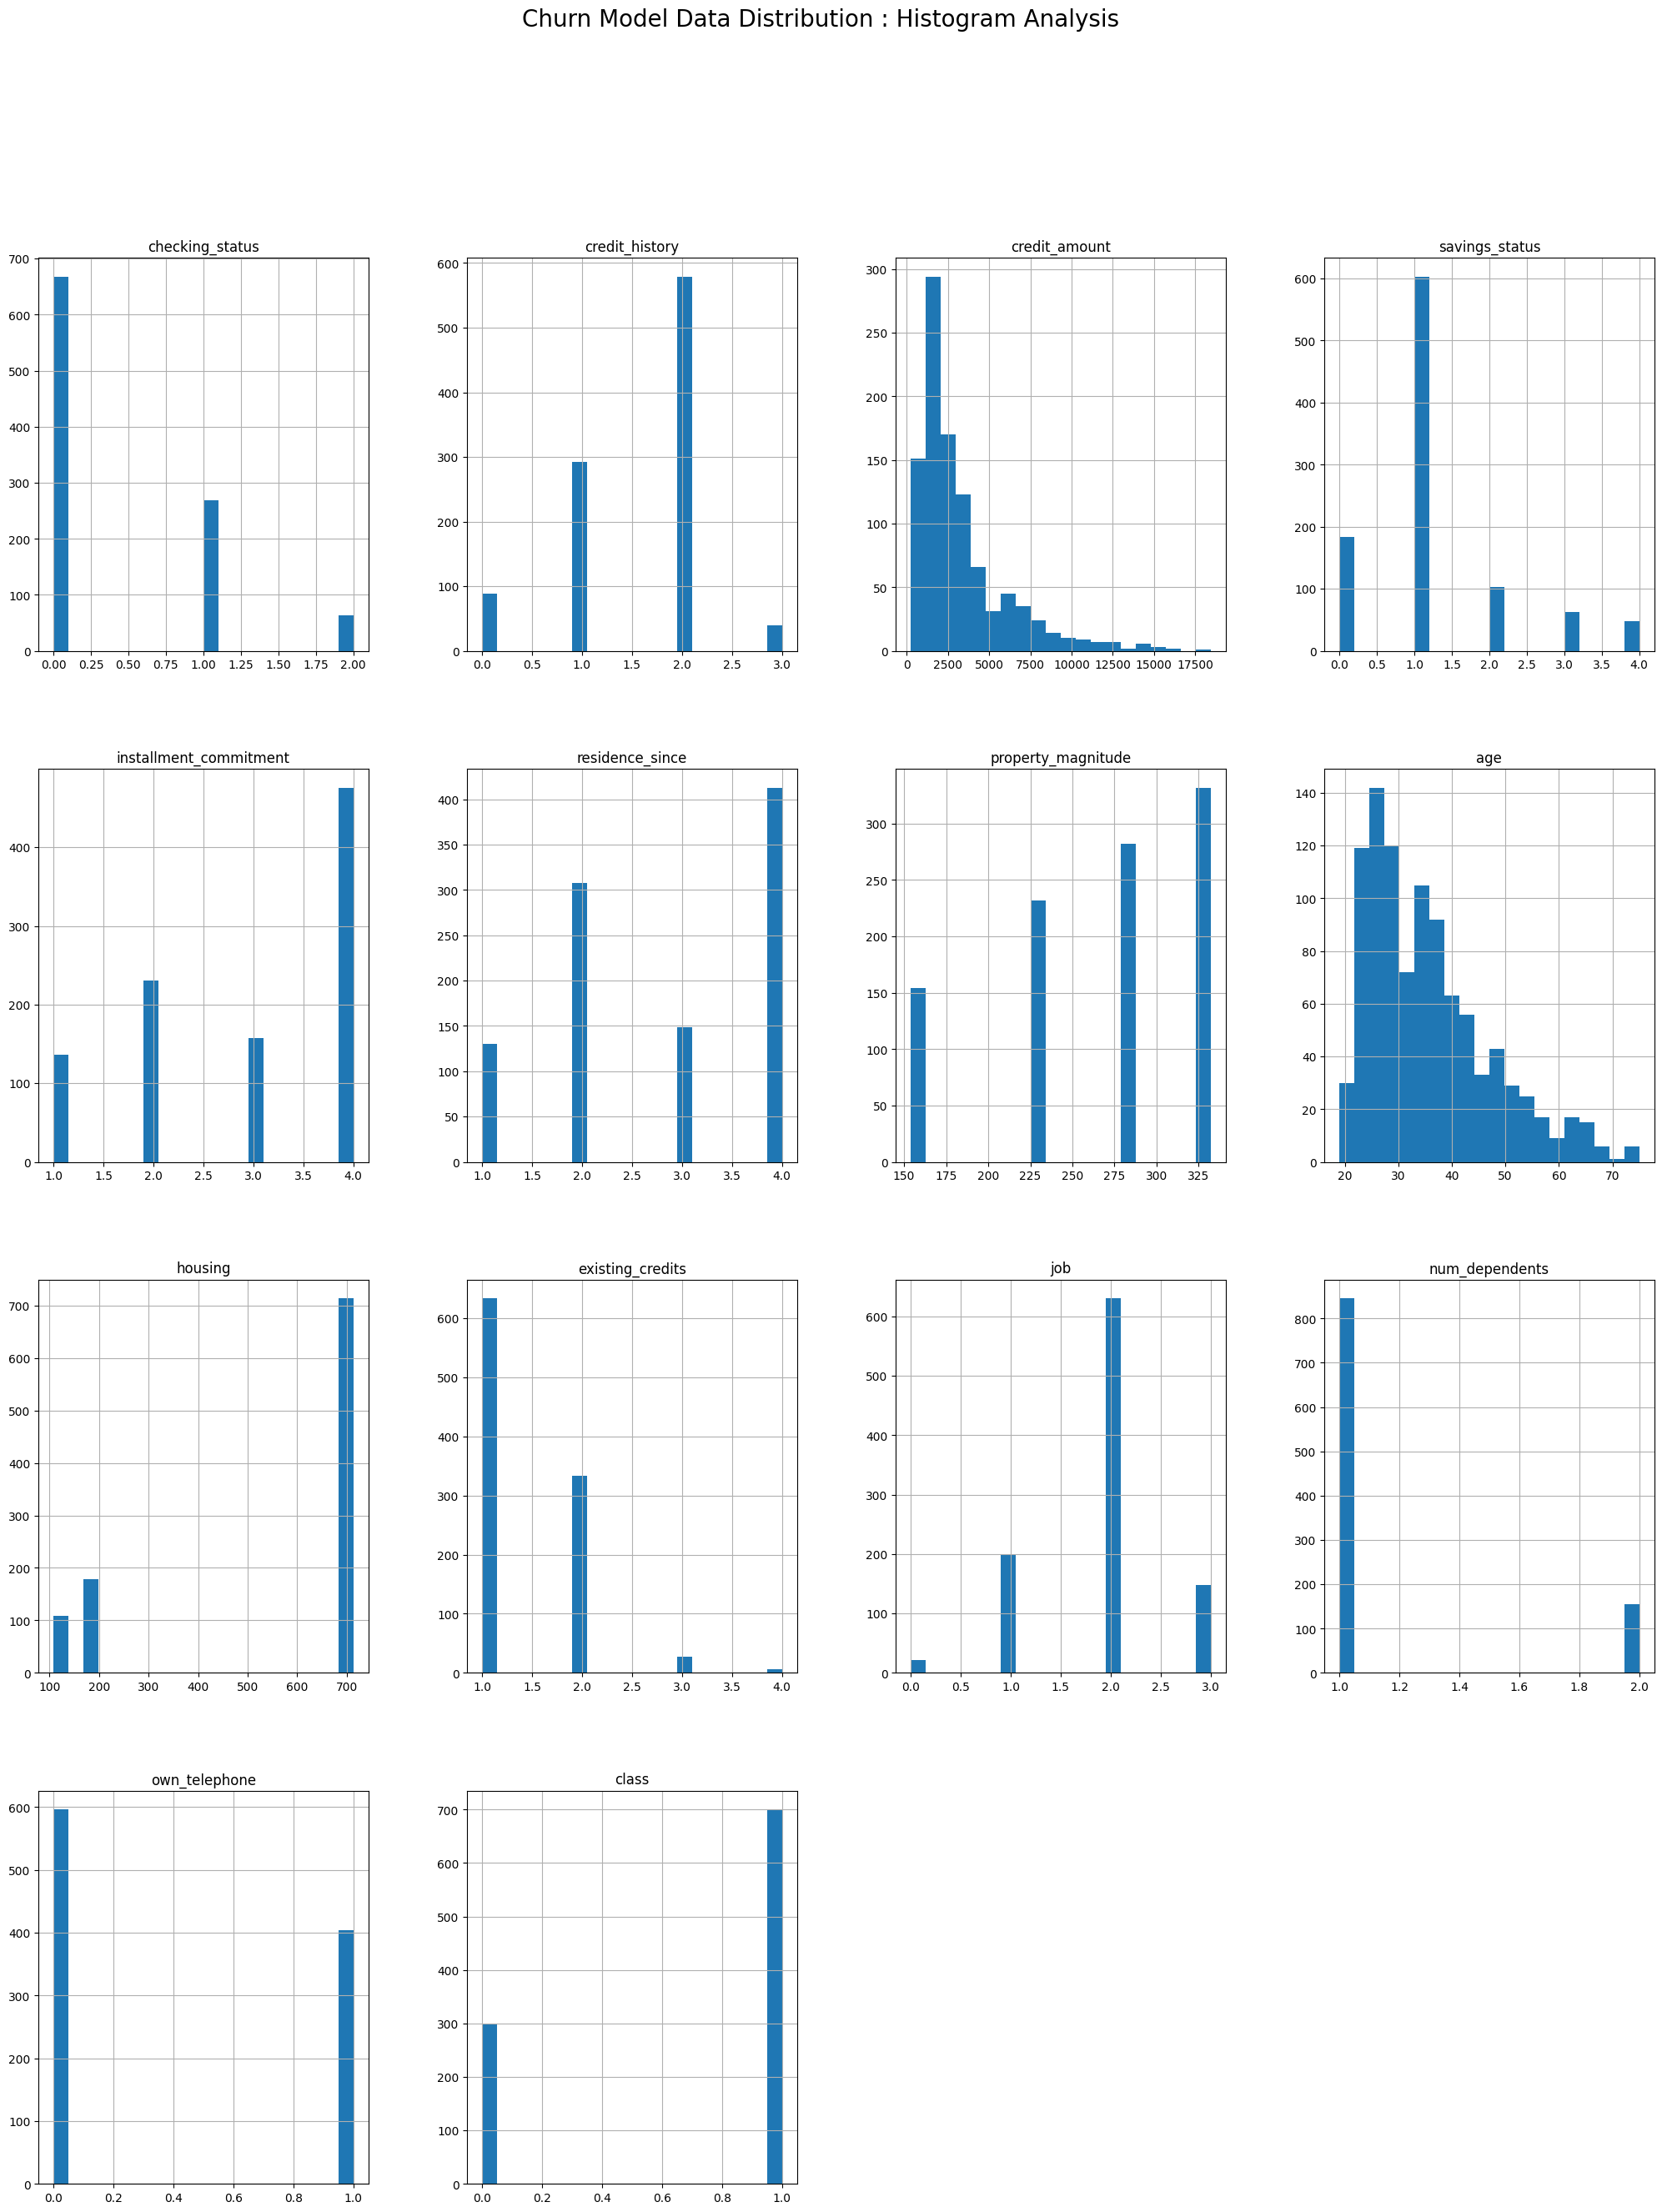

In [32]:
df.hist(bins=20,figsize=(25,30))
plt.suptitle("Churn Model Data Distribution : Histogram Analysis",fontsize=20)
plt.show()

In [33]:
# Calculate skewness for each column
skewness = df.skew()

# Sort the skewness values in ascending order
sorted_skewness = skewness.sort_values(ascending=True)

# Display the sorted skewness values
print(sorted_skewness)

housing                  -0.960882
class                    -0.874183
credit_history           -0.659001
property_magnitude       -0.633101
installment_commitment   -0.531348
job                      -0.374295
residence_since          -0.272570
own_telephone             0.391868
age                       1.020739
checking_status           1.266679
existing_credits          1.272576
savings_status            1.310342
num_dependents            1.909445
credit_amount             1.949628
dtype: float64


In [34]:
df_copy = df.copy()

# Log transformation of skewed columns 
df["age"] = np.log1p(df["age"])
df["credit_amount"] = np.log1p(df["credit_amount"])

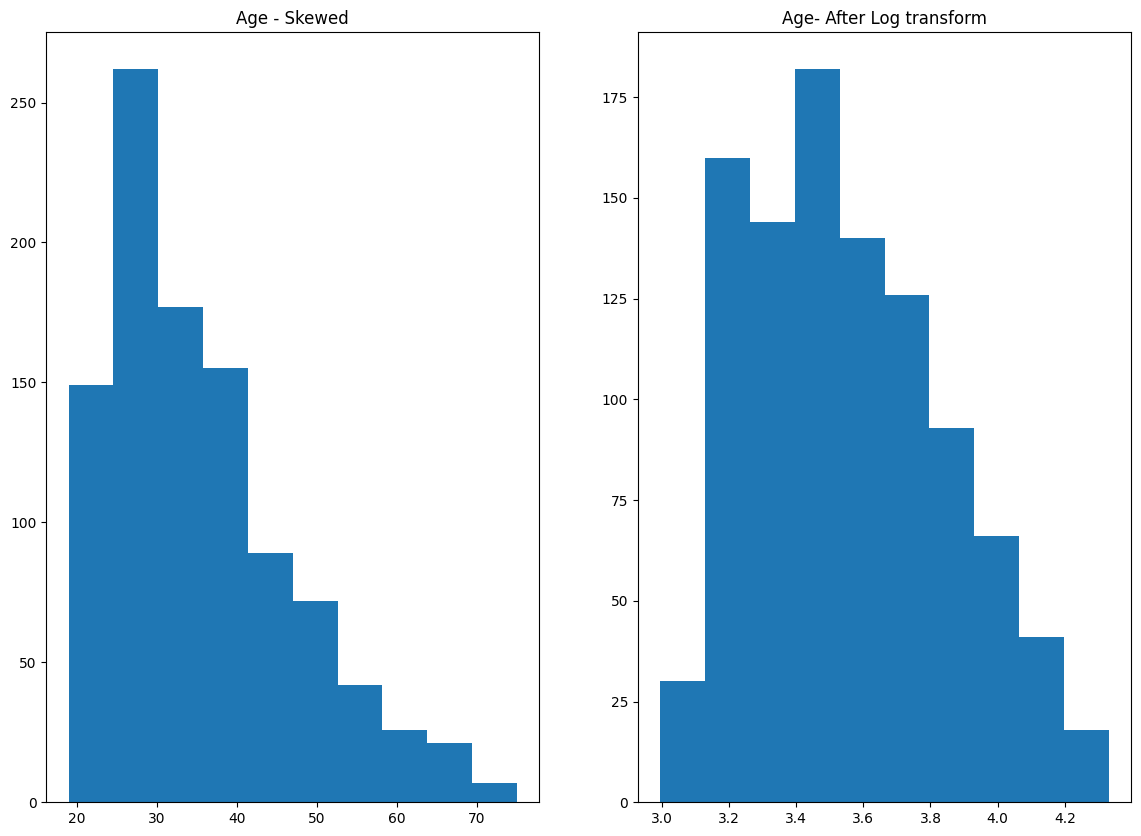

In [35]:
plt.figure(figsize=(14,10))

ax1 = plt.subplot(1,2,1)
cp = plt.hist(df_copy["age"])
plt.title("Age - Skewed")

ax2 = plt.subplot(1,2,2)
plt.hist(df["age"])
plt.title("Age- After Log transform")
plt.show()

## Logistic Regression Algorithm

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_score,recall_score,f1_score

In [37]:
x=df.drop(columns=["class"])
y=df["class"]

In [38]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [39]:
scaler= StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test) # No fit used because - To avoid data leakage 

In [40]:
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [41]:
y_pred = model.predict(x_test)

In [42]:
print("Accuracy :",accuracy_score(y_test,y_pred))
print("Precision score :",precision_score(y_test,y_pred))
print("Recall Score :",recall_score(y_test,y_pred))
print("Confusion Matrix :", confusion_matrix(y_test,y_pred))
print("F1-SCORE :",f1_score(y_test,y_pred))
print("classification_report :")
print(classification_report(y_test,y_pred))

Accuracy : 0.71
Precision score : 0.7318435754189944
Recall Score : 0.9290780141843972
Confusion Matrix : [[ 11  48]
 [ 10 131]]
F1-SCORE : 0.81875
classification_report :
              precision    recall  f1-score   support

           0       0.52      0.19      0.28        59
           1       0.73      0.93      0.82       141

    accuracy                           0.71       200
   macro avg       0.63      0.56      0.55       200
weighted avg       0.67      0.71      0.66       200



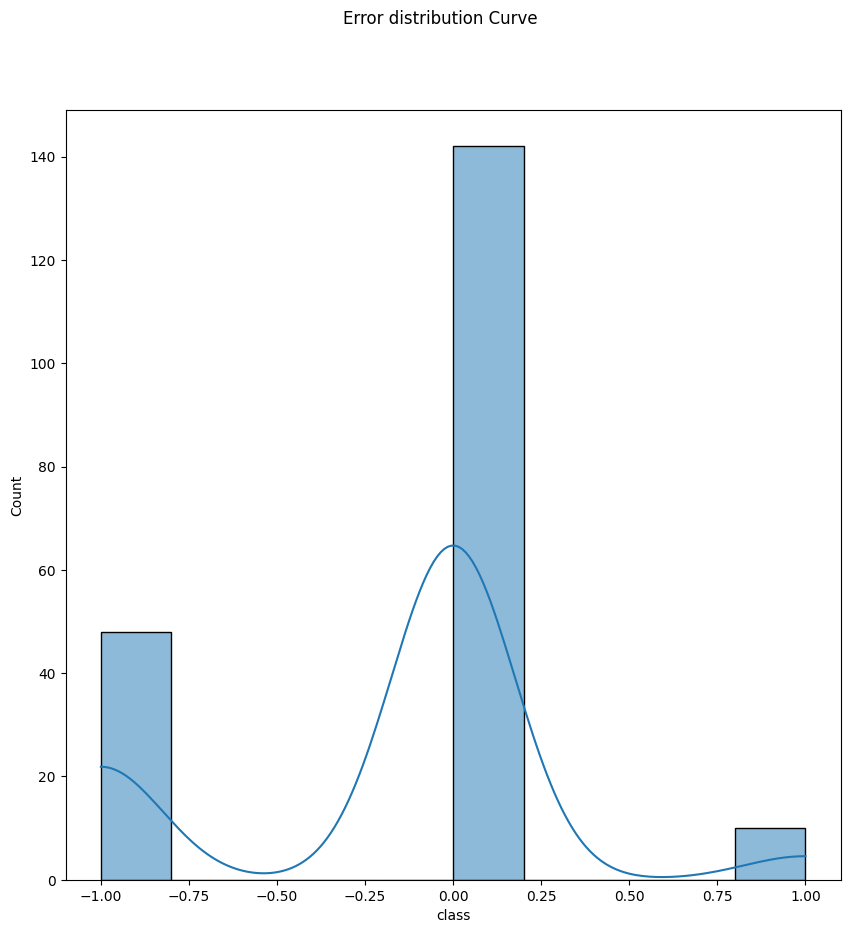

In [43]:
import seaborn as sns

H=y_test-y_pred
plt.figure(figsize=(10,10))
sns.histplot(bins=10,x=H,kde=True)
plt.suptitle("Error distribution Curve")
plt.show()

## ROC curve

In [44]:
y_pred_proba = model.predict_proba(x_test)[:,1] # 1 represents the positive only
y_pred_proba

array([0.6477778 , 0.76838474, 0.78354164, 0.46297922, 0.7395367 ,
       0.75043293, 0.80299699, 0.69980687, 0.58571168, 0.80496269,
       0.8010027 , 0.63823753, 0.71789881, 0.36649175, 0.36912794,
       0.78520403, 0.57046533, 0.92786999, 0.52703022, 0.8592731 ,
       0.56842526, 0.80503974, 0.76540501, 0.8825887 , 0.80857195,
       0.6396263 , 0.41952295, 0.36515296, 0.53557666, 0.64807107,
       0.69366197, 0.77655588, 0.7827938 , 0.82510684, 0.64563157,
       0.47400222, 0.63254048, 0.63329469, 0.86836651, 0.42435532,
       0.50590602, 0.89137012, 0.59356554, 0.82046608, 0.81821189,
       0.90092982, 0.81440434, 0.66846941, 0.70655261, 0.75077448,
       0.49032384, 0.71419859, 0.83332216, 0.63927879, 0.84760874,
       0.80390288, 0.69152667, 0.55773124, 0.53640716, 0.74787634,
       0.49210689, 0.81597709, 0.49115123, 0.86644498, 0.5087294 ,
       0.70420866, 0.72921461, 0.62478981, 0.64164158, 0.68281149,
       0.64233078, 0.79962995, 0.92542441, 0.63287102, 0.64293

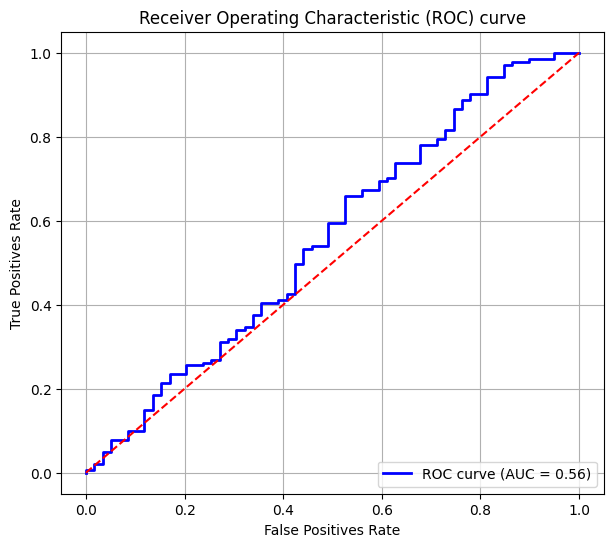

In [45]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test,y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(7,6))
plt.plot(fpr,tpr,color="blue",lw=2,label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0,1],[0,1],color="red",linestyle="--")
plt.xlabel("False Positives Rate")
plt.ylabel("True Positives Rate")
plt.title("Receiver Operating Characteristic (ROC) curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


## Naive Bayes Algorithm

In [46]:
x=df.drop(columns=["class"])
y=df["class"]

In [47]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [48]:
scaler= StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test) # No fit used because - To avoid data leakage 

In [49]:
from sklearn.naive_bayes import GaussianNB

NBmodel = GaussianNB()
NBmodel.fit(x_train,y_train)

GaussianNB()

In [50]:
y_pred = NBmodel.predict(x_test)

In [51]:
print("Accuracy :",accuracy_score(y_test,y_pred))
print("Precision score :",precision_score(y_test,y_pred))
print("Recall Score :",recall_score(y_test,y_pred))
print("Confusion Matrix :", confusion_matrix(y_test,y_pred))
print("F1-SCORE :",f1_score(y_test,y_pred))
print("classification_report :")
print(classification_report(y_test,y_pred))

Accuracy : 0.645
Precision score : 0.7215189873417721
Recall Score : 0.8085106382978723
Confusion Matrix : [[ 15  44]
 [ 27 114]]
F1-SCORE : 0.7625418060200669
classification_report :
              precision    recall  f1-score   support

           0       0.36      0.25      0.30        59
           1       0.72      0.81      0.76       141

    accuracy                           0.65       200
   macro avg       0.54      0.53      0.53       200
weighted avg       0.61      0.65      0.63       200



## Finding Best Performing Model

In [52]:
# for classification algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier


clas_models={"lr":LogisticRegression(max_iter=500),
             "rfc":RandomForestClassifier(),
             "dtc":DecisionTreeClassifier(),
             "knn":KNeighborsClassifier(n_neighbors=11),
             "svm":SVC(kernel="linear"),
             "gbc":GradientBoostingClassifier(random_state=0,learning_rate=0.45),
             "etc":ExtraTreesClassifier(),
             "nb":GaussianNB()}

#dictionary to store results
results={"model":[],"accuracy":[],"precision":[],"recall":[],"f1":[]}

#evaluate each model:
for model_name,model in clas_models.items():
    #train the model :
    model.fit(x_train,y_train)
    model_pred=model.predict(x_test)
    # print(model_pred)
    # calcualate metrics
    accuracy=accuracy_score(y_test,model_pred)
    precision=precision_score(y_test,model_pred)
    recall=recall_score(y_test,model_pred)
    f1=f1_score(y_test,model_pred)

    # store result in dictionary
    results["model"].append(model)
    results["accuracy"].append(accuracy)
    results["precision"].append(precision)
    results["recall"].append(recall)
    results["f1"].append(f1)
    
    # convert resulyts to dataframe
results_df=pd.DataFrame(results)

    #Display the results in a table 
results_df.style.background_gradient('Reds')


,model,accuracy,precision,recall,f1
0,LogisticRegression(max_iter=500),0.710000,0.731844,0.929078,0.818750
1,RandomForestClassifier(),0.715000,0.753012,0.886525,0.814332
2,DecisionTreeClassifier(),0.645000,0.786885,0.680851,0.730038
3,KNeighborsClassifier(n_neighbors=11),0.725000,0.741573,0.936170,0.827586
4,SVC(kernel='linear'),0.705000,0.705000,1.000000,0.826979
5,"GradientBoostingClassifier(learning_rate=0.45, random_state=0)",0.745000,0.777778,0.893617,0.831683
6,ExtraTreesClassifier(),0.705000,0.744048,0.886525,0.809061
7,GaussianNB(),0.645000,0.721519,0.808511,0.762542


## Demonstration (Final Report)

Best Performing Model :

Gradient Boosting Classifier achieved the highest overall performance with:

Accuracy: 74.5%

Precision: 77.8%

Recall: 89.3%

F1-Score: 83.2%

This model best balances false positives and false negatives, making it ideal for identifying risky customers while minimizing misclassifications.

Insights :

SVM had the highest recall (1.00) — it detects nearly all risky customers, but at a slight precision cost.

KNN and Logistic Regression also performed competitively, showing stable recall and F1-scores.

Gradient Boosting outperformed others overall, likely due to its ability to capture complex nonlinear relationships in the data.

Conclusion :

An AI-based Credit Risk Model using Gradient Boosting Classifier can accurately classify customers as risky or non-risky, supporting better loan approval decisions and risk management for financial institutions.